<a href="https://colab.research.google.com/github/marce3-2140/Neural-Networks/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/CD-DS-Course/blob/main/docs/extra_project_template/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📈💔 Heart Failure Prediction Dataset**


**Presentado por:** Marcela Giraldo

* **Tomado de:** [kaggle.com/datasets/rajanand/cab-survey](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
* **fecha de publicación:** Tue Aug 08/2017 14:16:18
* **Track**: People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
* **Autor:** Rajanand Ilangovan.
* **cita**: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved([link](https://www.kaggle.com/fedesoriano/heart-failure-prediction))
* **Licence:** Database: Open Database, Contents: © Original Authors


In [26]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file = '/content/drive/MyDrive/CodingDojo/Modulos/Redes Neuronales/heart - heart.csv'
df = pd.read_csv(file)

**Dictionary**

| Age: age of the patient [years]                                                                                                                                                                                                                          |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Sex: sex of the patient [M: Male, F: Female]                                                                                                                                                                                                             |
| ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]                                                                                                                                      |
| RestingBP: resting blood pressure [mm Hg]                                                                                                                                                                                                                |
| Cholesterol: serum cholesterol [mm/dl]                                                                                                                                                                                                                   |
| FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                                                                                                                                                                               |
| RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality  (T wave inversions and/or ST elevation or depression of > 0.05 mV),  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]                                                                                                                                                                                    |
| ExerciseAngina: exercise-induced angina [Y: Yes, N: No]                                                                                                                                                                                                  |
| Oldpeak: oldpeak = ST [Numeric value measured in depression]                                                                                                                                                                                             |
| ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]                                                                                                                                                       |
| HeartDisease: output class [1: heart disease, 0: Normal]                                                                                                                                                                                                 |

### **Data Exploratory**

In [5]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Categorical Characteristics Review**

In [9]:
cat = df.select_dtypes(include='object')
cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [10]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [11]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [12]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

**Target**

In [14]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### **Preprocesing**

In [15]:
# Split data
X = df.drop(columns = 'HeartDisease')
# Target
y = df['HeartDisease']

# Division, training, validation, testing
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [16]:
#Separamos columnas numericas y categoricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#instanciar pipelines para imputar para datos numericos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#instanciar pipelines para imputar para datos categoricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#transformar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [20]:
#entrenar con X_train y aplicar a X_train y X_test
preprocessor.fit(X_train)
X_train=preprocessor.transform(X_train)
X_test=preprocessor.transform(X_test)
X_val = preprocessor.transform(X_val)

In [21]:
# Input shape
input_shape = X_train.shape[1]
print(input_shape)

20


In [27]:
# Modelo sin regularización
model = Sequential()
# Primera capa oculta
model.add(Dense(11,
                input_dim = input_shape,
                activation = 'relu'))
# A continuación agregamos nuestra capa de dropout

model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy']) # bce: binary cross entropy
early_stopping = EarlyStopping(patience = 5) # Número de iteraciones sin mejora antes de parar el entrenamiento
history_earlystop = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50
19/19 [==============================] - 2s 13ms/step - loss: 0.7473 - accuracy: 0.4532 - val_loss: 0.7509 - val_accuracy: 0.4185
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.7205 - accuracy: 0.4532 - val_loss: 0.7256 - val_accuracy: 0.4185
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.7002 - accuracy: 0.4566 - val_loss: 0.7025 - val_accuracy: 0.4185
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.4770 - val_loss: 0.6816 - val_accuracy: 0.4293
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.6639 - accuracy: 0.5213 - val_loss: 0.6632 - val_accuracy: 0.4511
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.5724 - val_loss: 0.6472 - val_accuracy: 0.5217
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.6286 - val_loss: 0.6333 - val_accuracy: 0.6196
Epoch 8/50
19/19 [=

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                231       
                                                                 
 dense_11 (Dense)            (None, 10)                120       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 364 (1.42 KB)
Trainable params: 364 (1.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


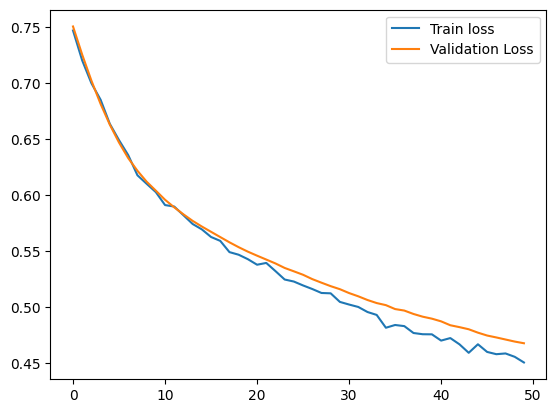

In [30]:
# Visualizar la perdida
plt.plot(history_earlystop.history['loss'], label='Train loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.legend();

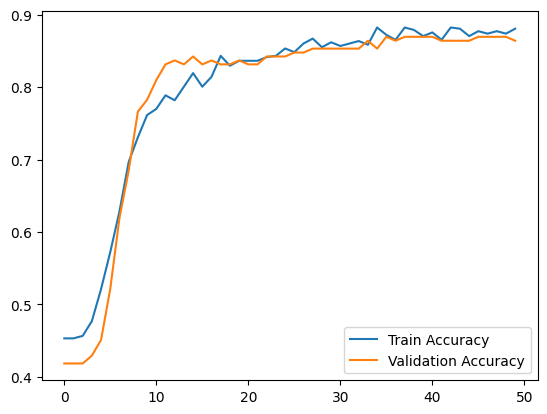

In [31]:
# Visualizar el accuracy
plt.plot(history_earlystop.history['accuracy'], label='Train Accuracy')
plt.plot(history_earlystop.history['val_accuracy'], label='Validation Accuracy')
plt.legend();